In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import acf , pacf , plot_acf , plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
data = pd.read_csv(r"D:\4TH SEMESTER\MACHINE LEARNING TECHNIQUES\PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
data.isnull().sum()/100

No          0.00
year        0.00
month       0.00
day         0.00
hour        0.00
PM2.5       9.25
PM10        7.18
SO2         9.35
NO2        10.23
CO         17.76
O3         17.19
TEMP        0.20
PRES        0.20
DEWP        0.20
RAIN        0.20
wd          0.81
WSPM        0.14
station     0.00
dtype: float64

In [5]:
data.drop(["No"], axis=1, inplace=True)

In [6]:
data.rename(columns = {'year': 'Year',
                       'month': 'Month',
                       'day': "Day",
                       'hour': 'Hour',
                       'DEWP': 'DewP',
                       'TEMP': 'Temperature',
                       'PRES': 'Pressure',
                       'RAIN': 'Rain',
                       'wd': 'Wind Direction',
                       'WSPM': 'Wind Speed',
                       'station': 'Station'}, inplace = True)

In [7]:
data

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DewP,Rain,Wind Direction,Wind Speed,Station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [8]:
import datetime
data['Date']=pd.to_datetime(data[['Year','Month','Day']])

In [9]:
data['PM2.5'] = data['PM2.5'].fillna(data.groupby('Month')['PM2.5'].transform('mean'))
data['PM10'] = data['PM10'].fillna(data.groupby('Month')['PM10'].transform('mean'))
data['SO2'] = data['SO2'].fillna(data.groupby('Month')['SO2'].transform('mean'))
data['NO2'] = data['NO2'].fillna(data.groupby('Month')['NO2'].transform('mean'))
data['CO'] = data['CO'].fillna(data.groupby('Month')['CO'].transform('mean'))
data['O3'] = data['O3'].fillna(data.groupby('Month')['O3'].transform('mean'))
data['Temperature'] = data['Temperature'].fillna(data.groupby('Month')['Temperature'].transform('mean'))
data['Pressure'] = data['Pressure'].fillna(data.groupby('Month')['Pressure'].transform('mean'))
data['DewP'] = data['DewP'].fillna(data.groupby('Month')['DewP'].transform('mean'))
data['Rain'] = data['Rain'].fillna(data.groupby('Month')['Rain'].transform('mean'))
data['Wind Speed'] = data['Wind Speed'].fillna(data.groupby('Month')['Wind Speed'].transform('mean'))

In [10]:
data = data.groupby('Station').apply(lambda x: x.fillna(x.mode().iloc[0]))

In [11]:
data.isnull().sum()/100

Year              0.0
Month             0.0
Day               0.0
Hour              0.0
PM2.5             0.0
PM10              0.0
SO2               0.0
NO2               0.0
CO                0.0
O3                0.0
Temperature       0.0
Pressure          0.0
DewP              0.0
Rain              0.0
Wind Direction    0.0
Wind Speed        0.0
Station           0.0
Date              0.0
dtype: float64

In [12]:
data.drop(["Year","Month","Day"], axis=1, inplace=True)
data.set_index('Date')

,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DewP,Rain,Wind Direction,Wind Speed,Station
Date,,,,,,,,,,,,,,
2013-03-01,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
2017-02-28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
2017-02-28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Hour            35064 non-null  int64         
 1   PM2.5           35064 non-null  float64       
 2   PM10            35064 non-null  float64       
 3   SO2             35064 non-null  float64       
 4   NO2             35064 non-null  float64       
 5   CO              35064 non-null  float64       
 6   O3              35064 non-null  float64       
 7   Temperature     35064 non-null  float64       
 8   Pressure        35064 non-null  float64       
 9   DewP            35064 non-null  float64       
 10  Rain            35064 non-null  float64       
 11  Wind Direction  35064 non-null  object        
 12  Wind Speed      35064 non-null  float64       
 13  Station         35064 non-null  object        
 14  Date            35064 non-null  datetime64[ns]
dtypes:

Text(0.5, 1.0, 'ROLLING AVERAGES')

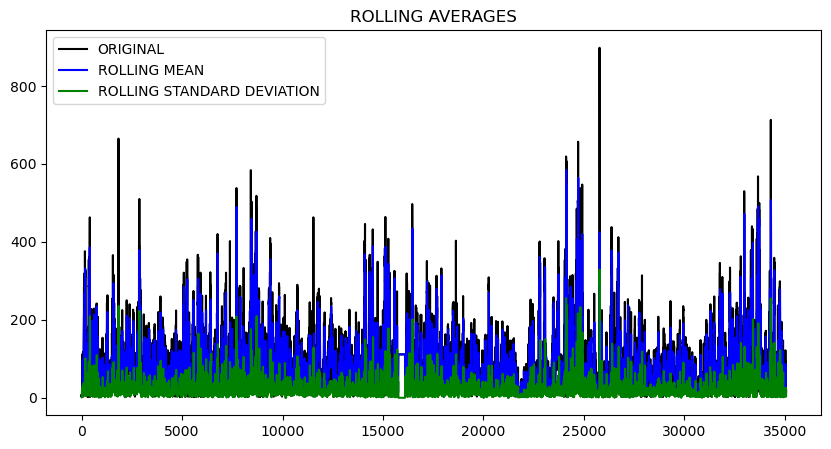

In [14]:
MA = data['PM2.5'].rolling(window = 12).mean()
MSTD = data['PM2.5'].rolling(window = 12).std()

plt.figure(figsize = (10,5))
data_plot = plt.plot(data['PM2.5'] , color = 'black' , label = 'ORIGINAL')
mean = plt.plot(MA , color = 'blue' , label = 'ROLLING MEAN')
std = plt.plot(MSTD , color = 'green' , label = 'ROLLING STANDARD DEVIATION')
plt.legend(loc = 'best')
plt.title('ROLLING AVERAGES')

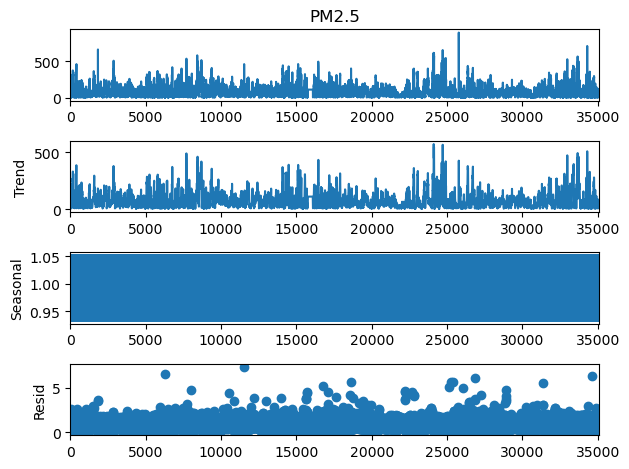

In [15]:
decompose = seasonal_decompose(data['PM2.5'],period = 12, model = 'multiplicative').plot()
plt.show()

In [16]:
adf_test = adfuller(data['PM2.5'], autolag='AIC')
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic : ','p-value : ','#Lags Used : ','Number of Observations Used : '])
for key,value in adf_test[4].items():
    adf_output['Critical Value (%s)'%key] = value
print(adf_output)

Test Statistic :                    -19.160934
p-value :                             0.000000
#Lags Used :                         51.000000
Number of Observations Used :     35012.000000
Critical Value (1%)                  -3.430537
Critical Value (5%)                  -2.861623
Critical Value (10%)                 -2.566814
dtype: float64


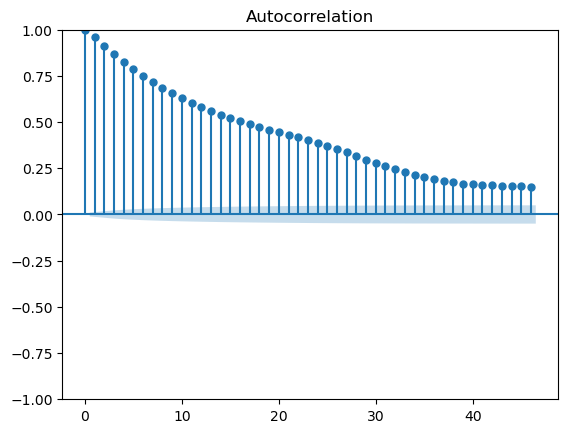

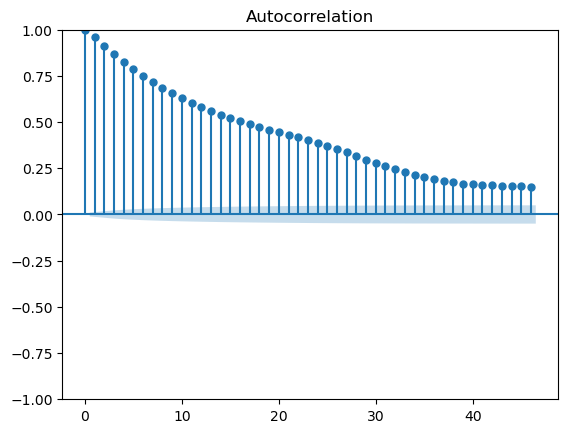

In [17]:
plot_acf(data['PM2.5'])

C:\Users\chon2\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


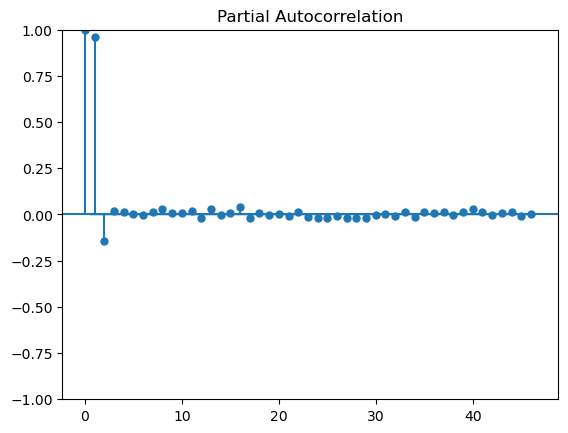

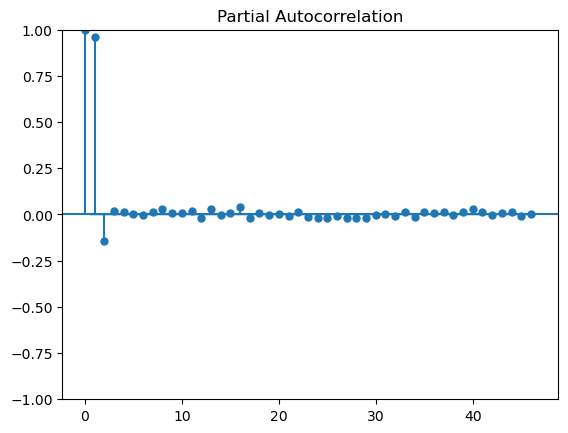

In [18]:
plot_pacf(data['PM2.5'])

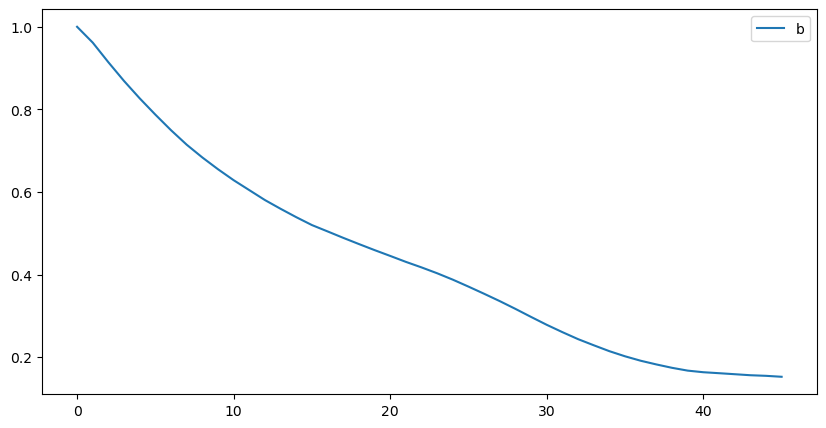

In [19]:
acf(data['PM2.5'])
plt.figure(figsize = (10,5))
acf_plot = plt.plot(acf(data['PM2.5']))
plt.legend('best')
plt.show()

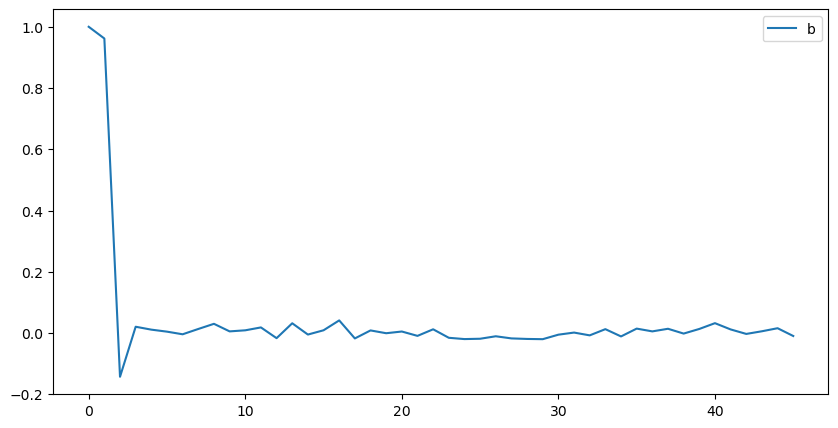

In [20]:
pacf(data['PM2.5'])
plt.figure(figsize = (10,5))
acf_plot = plt.plot(pacf(data['PM2.5']))
plt.legend('best')
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
model_arima = ARIMA(data['PM2.5'], order=(2, 0, 0)) 
model = model_arima.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                35064
Model:                 ARIMA(2, 0, 0)   Log Likelihood             -158156.974
Date:                Sun, 16 Apr 2023   AIC                         316321.948
Time:                        07:38:07   BIC                         316355.808
Sample:                             0   HQIC                        316332.732
                              - 35064                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.0011      3.553     23.364      0.000      76.038      89.964
ar.L1          1.0991      0.001    835.154      0.000       1.097       1.102
ar.L2         -0.1429      0.001   -130.168      0.000      -0.145      -0.141
sigma2       484.5030      0.697    695.004      0.000     483.137     485.869
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):          10399544.71
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        87.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

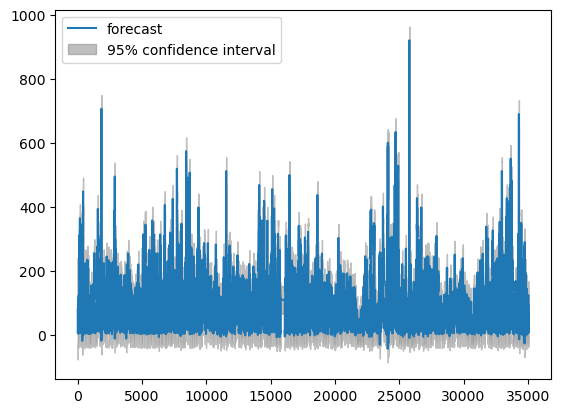

In [23]:
model_pred = plot_predict(model)
plt.show()